# Assignment 2: Elasticsearch and Text Mining

Due: Monday, December 12, 2022, at 2pm via Moodle

**Team Members** `<Fill out>`

### Submission Guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find this notebook contains some pre-filled cells that you should complete for the individual tasks.
- For answers requiring written solutions, use Markdown cells (in combination with Jupyter LaTeX support) **inside this notebook**. Do *not* hand in any separate files, simply re-upload the `.ipynb` file.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- Make sure that the names of all team members are present in the solution.

In [2]:
%%bash
. ~/.bashrc
python3 -m pip install -r requirements.txt
# Install necessary packages

CalledProcessError: Command 'b'. ~/.bashrc\npython3 -m pip install -r requirements.txt\n# Install necessary packages\n'' returned non-zero exit status 1.

In [4]:
%%bash
./ ~/.bashrc
python3 -m spacy download en_core_web_sm
# Install required language model for spaCy

CalledProcessError: Command 'b'./ ~/.bashrc\npython3 -m spacy download en_core_web_sm\n# Install required language model for spaCy\n'' returned non-zero exit status 1.


## Question 2-1: "The Simpsons" Dataset (1 + 4 + 3 + 2 + 6 + 5 = 21 points)

"The Simpsons" is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this exercise, you will work with the dataset that contains characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
We will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`

Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows, and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

In [1]:
# General imports
import os

import pandas as pd
import numpy as np
import spacy
import matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Ensure matplotlib works correctly with Jupyter
%matplotlib inline

### 1. Data Loading (1 point)
Load the four datasets in the respective variables using pandas, and make sure to set the type of the `character_id` to integer.

In [160]:
df_characters = pd.read_csv("data/simpsons_characters.csv")
df_locations = pd.read_csv("data/simpsons_locations.csv")
df_script = pd.read_csv("data/simpsons_script_lines.csv")
df_episodes = pd.read_csv("data/simpsons_episodes.csv")

C:\Users\gerbk\AppData\Local\Temp\ipykernel_17008\1991298596.py:3: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_script = pd.read_csv("data/simpsons_script_lines.csv")


Drop all lines associated with the (non-numeric) character ID `142024`.

In [9]:
df_script.drop(df_script[df_script.character_id == "142024"].index, inplace = True)


Next, use panda's `.head()` function to inspect the top rows of each dataframe.

In [6]:
df_characters.head()
df_locations.head()
df_episodes.head()
df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


### 2. Prominent Characters (4 points)

Let us now take a look at the most important characters of the show. To start, retrieve the most prominent characters by the number of spoken words/lines throughout the show. 

Extract the top 10 characters based on the number of spoken words (word count), as well as the 10 most prominent characters regarding their sum total number of lines.

You might notice that there is a column with `word_count` in the `df_scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` entries and any other string characters in that column. You can use the provided `conv` function for this.

In [19]:
def conv(row):
    try:
        return int(row)
    except:
        return np.nan
# First apply the conv() filtering on the word count
df_script["word_count"] = df_script['word_count'].map(conv)
df_script["character_id"] = df_script['character_id'].map(conv)

# And then drop all `nan` values in "word_count"

# Hint: Make sure the operation is done in-place.
df_script.dropna(subset=[ 'word_count'], inplace = True)
df_script.dropna(subset=[ 'character_id'], inplace = True)
df_script.head(20)
### Your code ###

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33
5,9554,32,214,Martin Prince: (HOARSE WHISPER) I don't think ...,877000,True,38,3.0,Martin Prince,Springfield Elementary School,I don't think there's anything left to say.,i dont think theres anything left to say,8
6,9555,32,215,Edna Krabappel-Flanders: Bart?,881000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,Bart?,bart,1
7,9556,32,216,Bart Simpson: Victory party under the slide!,882000,True,8,3.0,Bart Simpson,Springfield Elementary School,Victory party under the slide!,victory party under the slide,5
9,9558,32,218,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...,889000,True,9,374.0,Lisa Simpson,Apartment Building,Mr. Bergstrom! Mr. Bergstrom!,mr bergstrom mr bergstrom,4
10,9559,32,219,"Landlady: Hey, hey, he Moved out this morning....",893000,True,469,374.0,Landlady,Apartment Building,"Hey, hey, he Moved out this morning. He must h...",hey hey he moved out this morning he must have...,19


In [20]:
# Now aggregate the top characters by words:
df_script['character_id'] = df_script['character_id'].astype('int')
top_characters_by_words = df_script.groupby(["character_id", "raw_character_text"])["word_count"].sum()
top_characters_by_words.sort_values( ascending = False, inplace = True)
top_characters_by_words.head(10)


# And do the same by lines:
top_characters_by_lines = df_script.groupby(["character_id", "raw_character_text"])["character_id"].size()
top_characters_by_lines.sort_values( ascending = False, inplace = True)
top_characters_by_lines.head(10)


character_id  raw_character_text 
2             Homer Simpson          27910
1             Marge Simpson          13192
8             Bart Simpson           13013
9             Lisa Simpson           10769
15            C. Montgomery Burns     3087
17            Moe Szyslak             2809
3             Seymour Skinner         2390
11            Ned Flanders            2057
31            Grampa Simpson          1807
71            Chief Wiggum            1796
Name: character_id, dtype: int64


Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.

In the second plot, you should do the same, but this time considering the number of lines (not words) for each character. Note that the characters shown in the two plots might differ.


<AxesSubplot:xlabel='character_id,raw_character_text'>

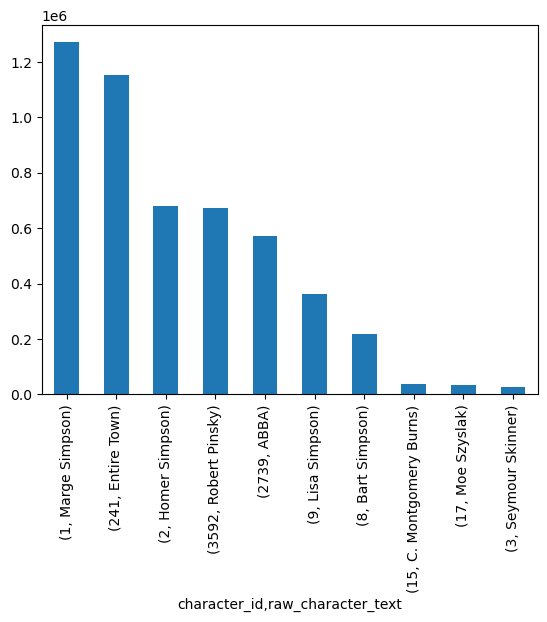

In [21]:
# First plot: Top 10 characters by word count
# Hint: Try to use the integration of matplotlib and pandas to directly plot from a dataframe.

top_characters_by_words.head(10).plot( x = "raw_character_text", y = [2], kind ="bar")


<AxesSubplot:xlabel='character_id,raw_character_text'>

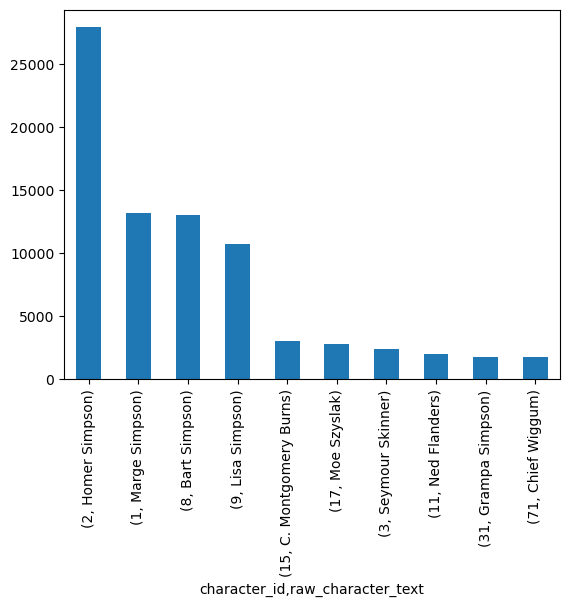

In [22]:
# Second plot: Top 10 characters by lines

top_characters_by_lines.head(10).plot( x = "raw_character_text", y = [2], kind ="bar")

Compare the results of the two plots: What do you notice? Do the results look correct to you?

Homer Simpsons seems to say less words in a lot more lines than the other main characters. This is likely due to his character being prone to onelines like "doh!" and all around him being portrayed as less inteligent. This phenomenon can also be seen when comparing Marge Simpson to Bart Simpson. Marge has about the same amount of lines as bart while using six times the words Bart uses in his lines. This seems unusual. 

There is an error in the Data suggesting that ABBA and Robert Pinsky have a majority of words in the show. This is likely due to data quality problems, as they are not major characters.

### 3. Common Words (3 points)

We continue by examining the dialogues in more detail, by looking at the top 20 most commonly appearing words (tokens).

To generate a meaningful output, use the following pre-processing pipeline, parts of which were explained in more detail during the tutorials and the lecture:
- Use spaCy (`en_core_web_sm`) to process all text.
- Instead of considering the raw text, use the lemmatized token provided by spaCy.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

In [23]:
# Load the spacy model specified above. Make sure to disable the "ner" component for more speed.
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipes('ner')

word_list =[]

# Iterate over the spoken words (Hint: df_script) and append the lemmatized tokens as detailed above
for spoken_words in df_script["spoken_words"]: 
    doc = nlp(spoken_words)
    for token in doc:
        if token.pos_ != "PUNCT":
            if token.is_stop == False:
                word_list.append(token.lemma_)


word_counter = Counter(word_list)
counter.most_common(20)

NameError: name 'Counter' is not defined

In [24]:
counts = pd.Series(word_list).value_counts()
counts.sort_values(ascending = False, inplace = True)
counts.head(20)

oh       8483
like     6235
go       5486
know     5458
get      5075
hey      4320
think    4109
right    4107
come     4055
Homer    3974
look     3719
good     3646
want     3574
Bart     3546
to       3483
let      3277
uh       3066
yeah     2935
time     2759
man      2667
dtype: int64

Now plot a graph with the top 20 words on the x-axis and their respective frequencies on the y-axis, similar to the previous question.

<AxesSubplot:>

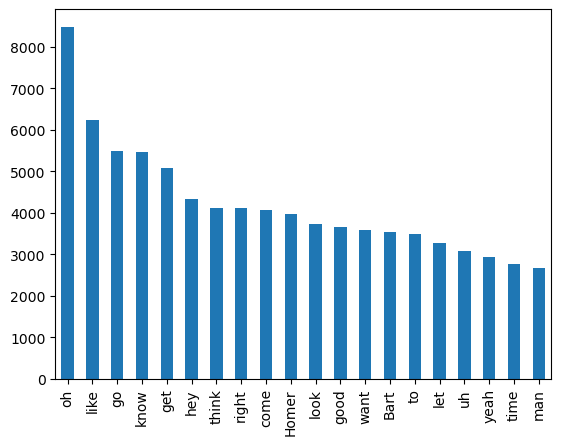

In [25]:
# Provide a plot of the frequencies of the most common 20 words.
counts.head(20).plot( x = [0], y = [1], kind ="bar")

### 4. Named Entity Wordcloud (2 points)

Apply named entity recognition (NER) using SpaCy and generate a word cloud of the most commonly appearing 50
named entities that have the type `PERSON`. Visualize the resulting entities in a word cloud.
Take into account that you cannot simply use the 
output of the previous task, since NER was explicitly disabled.
 Since the named entity recognition takes quite some time, use only the first `10000` scripts.

In [32]:
# Load the English spacy model again, but this time do not disable the NER module.
persons = []

nlp = spacy.load("en_core_web_sm")

# Extract named entities of the type "PERSON" from each script.
for script in df_script.spoken_words.tolist()[:10000]:
    doc = nlp(script)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            persons.append(ent.text)

In [33]:
persons_pd = pd.Series(persons).value_counts()
persons_pd.sort_values(ascending = False, inplace = True)
persons_pd.head(50)

Lisa                 89
Marge                79
Simpson              70
Burns                47
Homer Simpson        45
Smithers             36
Homie                32
Maggie               32
Michael Jackson      22
Bart Simpson         19
Moe                  17
Lisa Simpson         16
Martin               16
Dad                  15
Principal Skinner    14
Bart                 13
Plow                 12
Lis                  11
Krabappel            11
Ned Flanders         10
Bob                  10
Ned                  10
Lurleen              10
Skinner               9
Sideshow Bob          9
Wiggum                8
Homer                 8
Barney                8
Bergstrom             8
Aunt Selma            7
Lovejoy               7
Hibbert               7
Springfield           7
Lenny                 7
Lanley                7
Laura                 7
Nelson                6
Strawberry            6
Kent Brockman         6
Steve Sax             5
Michael               5
Marge Simpson   

To visualize the word cloud, you may use the `wordcloud` package, which works in combination with `matplotlib`. Make sure to limit the number of visible words to 50, and the maximum font size to 60.

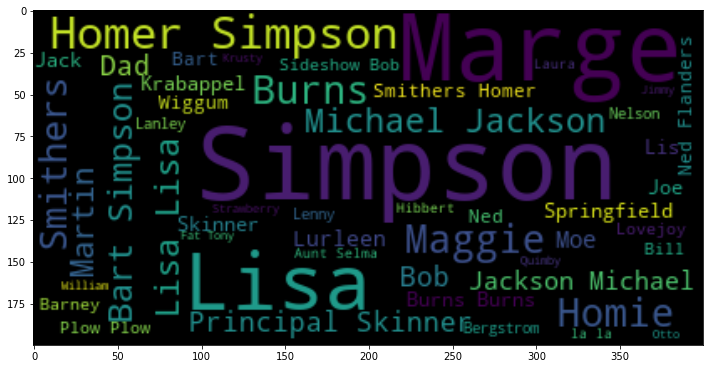

In [40]:
# Create matplotlib skeleton for word cloud figure
string_from_list=(" ").join(persons)

cloud = WordCloud(max_words = 50, max_font_size = 60).generate(string_from_list)

fig = plt.figure(1, figsize=(12,12))

plt.imshow(cloud, interpolation="bilinear")
#plt.axes("off")



### 5. Normalized Word Importance with TF-IDF (6 points)

The top words so far seem not too informative. We wish to find out the importance of particular words for specific characters, by looking at normalized frequency counts.
As an example, we expect the younger Simpson family members to exhibit a disproportionate frequency for the word "mom" or "dad", compared to other characters.

We looked at the normalization through Term Frequency - Inverse Document Frequency (TF-IDF) in the lecture, which we will use here to investigate lines by `Lisa Simpson` and `Bart Simpson`.

In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from the `scikit-learn` library. In addition, filter out stop words and words with a frequency of less than 5 occurrences from the analysis. Then plot the TF-IDF values for the top 10 words for Lisa and Bart as bar plots.

In [191]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

df_script = pd.read_csv("data/simpsons_script_lines.csv")

Lisa_Lines = df_script.loc[df_script["character_id"] == 9, 'normalized_text'] 
Bart_Lines = df_script.loc[df_script["character_id"] == 8, 'normalized_text'] 

C:\Users\gerbk\AppData\Local\Temp\ipykernel_17008\123284941.py:4: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_script = pd.read_csv("data/simpsons_script_lines.csv")


In [192]:
Lisa_Lines.head

<bound method NDFrame.head of 1                                       wheres mr bergstrom
3                                 that life is worth living
9                                 mr bergstrom mr bergstrom
11                       do you know where i could find him
13        the train how like him traditional yet environ...
                                ...                        
130989    i dont think shauna should choose any of you s...
130995         well bart i guess thats our cue to skedaddle
131038    face it were just kids we cant afford stuff wi...
131054    i sold a couple of my rare jazz records after ...
131058                        and dad donated something too
Name: normalized_text, Length: 9732, dtype: object>

In [170]:
print(Bart_Lines)

7                             victory party under the slide
17                             hey thanks for your vote man
19        well you got that right thanks for your vote g...
21        well dont sweat it just so long as a couple of...
23                                                    lewis
                                ...                        
131051    i woke up and the money jar was full that mean...
131052                                          snowball ii
131056    really but thats been in your family for gener...
131062    its weird to hear myself saying this but i lov...
131071                                  look thats our ship
Name: normalized_text, Length: 11268, dtype: object


In [131]:
# Plot the top 10 occurrences, weighted by TF-IDF



In [171]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words


In [193]:
tokens_without_sw_lisa = []
tokens_without_sw_bart = []
for a in Lisa_Lines.values:
    if type(a) == str:
        text_tokens = sp(a)
        for token in text_tokens:
            if token.text not in all_stopwords:
                tokens_without_sw_lisa.append(token.text)



In [194]:
for b in Bart_Lines.values:
    if type(b) == str:
        text_tokens = sp(b)
        for token in text_tokens:
            if token.text not in all_stopwords:
                tokens_without_sw_bart.append(token.text)



In [195]:
from collections import Counter

def removeElements(lst, k):
    counted = Counter(lst)

    temp_lst = []
    for el in counted:
        if counted[el] < k:
            temp_lst.append(el)

    res_lst = []
    for el in lst:
        if el not in temp_lst:
            res_lst.append(el)
    return(res_lst)

# Driver code


Lisa_List = removeElements(tokens_without_sw_lisa, 5)
Bart_List = removeElements(tokens_without_sw_bart, 5)

In [207]:
#instantiate CountVectorizer() 
cvl=CountVectorizer() 
cvb=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector_lisa=cvl.fit_transform(Lisa_List)
word_count_vector_bart=cvb.fit_transform(Bart_List)

In [197]:

word_count_vector_bart.shape


(35847, 1435)

In [208]:
tfidf_transformer_lisa=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer_lisa.fit(word_count_vector_lisa)

TfidfTransformer()

In [209]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer_lisa.idf_, index=cvl.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights']).head(10)

c:\Users\gerbk\anaconda3\envs\AML_bidde\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
nt,4.176618
dad,4.488054
bart,4.934408
mom,5.028884
oh,5.198443
like,5.435267
ve,5.524535
know,5.558229
think,5.694880
got,5.820282


In [210]:
tfidf_transformer_bart=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer_bart.fit(word_count_vector_bart)

TfidfTransformer()

In [211]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer_bart.idf_, index=cvb.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights']).head(10)

c:\Users\gerbk\anaconda3\envs\AML_bidde\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
nt,4.363370
dad,4.900871
hey,5.155541
oh,5.278453
got,5.391218
like,5.473328
mom,5.541622
ve,5.634841
know,5.658097
yeah,5.786599


Do your results look correct?

### Your answer here

By using `CountVectorizer` over the concatenation of all character-specific lines, we can then also compute a (non-normalized) document similarity between the lines of Lisa and Bart. Use cosine similarity over the two document vectors to compare the similarity.

For the `CountVectorizer`, use the same arguments as before (minimum 5 occurrences and no stop words).

In [214]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance


def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
 
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

cosine_distance_countvectorizer_method(' '.join(Lisa_List), ' '.join(Bart_List))

Similarity of two sentences are equal to  90.66 %


0.0933758301927079

### 6. NNMF Topics (5 points)

Uncover interesting topics by using non-negative matrix factorization (NNMF or NMF).

Use the `NMF` implementation from `sklearn` to detect the topics in the scripts, and use text cleaning steps similar to the first task. However, this time perform no lemmatization:
- Use spaCy (`en_core_web_sm`) to process all text.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

Set the `max_features` of `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, and `n_components=10`.

In [20]:
from sklearn.decomposition import NMF 

In [ ]:
# Clean the documents according to the specifications

In [ ]:
# Apply the NNMF method as specified above

In [22]:
def show_topics(components,num_top_words,vocab):
    #for each component or topic sorts the row values from large to small and 
    # returns the top words as the representation of the topic.
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in components])
    return [' '.join(t) for t in topic_words]

Use the `show_topics` method to show the top-20 words for the top 2 topics.

In [ ]:
### Your code

## Question 2-2: Boosting results in Elasticsearch (1 + 9 + 2 = 12 points)

Before you start, make sure to download the file `test_data.json`, available on [Moodle](https://moodle.uni-heidelberg.de/pluginfile.php/1006481/mod_label/intro/test-data.json). This question assumes you have a running installation of Elasticsearch 7.X on your machine. If not, make sure to follow the steps detailed in the first tutorial to set up an instance. To complete the following questions, you will have to adjust the given URLs with your own settings. Look out for mentions of `<login>`, `<password>` and `<port>` and replace them accordingly.

Bulk load the content of `test_data.json` into an index called `dishes`. You may use the following shell command:

```bash
curl -u <login>:<password> -H "Content-Type:application/x-ndjson" -XPOST http://localhost:<port>/dishes/_bulk --data-binary "@test_data.json"
```
1. Provide a command to extract the dynamic mapping that is created in this scenario. Make sure that the output mapping is included in your solution (potentially pasting it into another cell or execute through the ).

### Insert your answer here
Hint: Consider using the option `?pretty` for legible outputs

2. Write queries to the `dishes` index given the specified criteria. The matching documents should be included in your solution, including their respective scores.

a) Return all dishes that have a preparation time of less than 15 minutes

### Insert your answer here

b) All dishes that contain `spaghetti` in the title.

### Insert your answer here

c) All dishes that received at least one 5-star rating and were created after 2016.

### Insert your answer here

d) Dishes that serve between 6 to 8 people.

### Insert your answer here

e) Dishes that mention both of the phrases "pasta" and "parmigiano" in the instructions.

### Insert your answer here

f) All recipes that require more than 10 ingredients

### Insert your answer here

g) Extend your query from b), such that it searches for `spaghetti` in both the title *and* description field. Occurrences in the title field should be boosted by a factor of 3.

### Insert your answer here

3. The default analyzer might not be perfect for working with recipe data. Provide the definition of a custom analyzer which adheres to the following specifications:
   
   - It performs *no* stop word filtering.
   - It applies stemming to all tokens.
   - It does *not* lowercase tokens, but keeps the original case of letters.

### Insert your answer here

## Question 2-3: Document Representations (2 + 2 + 3 = 7 points)

Please fill out the answers directly in the provided fields.

#### a) Why is it preferable to use cosine distance over Euclidean distance when computing document similarity?

Answer:

#### b) Identify two shortcomings of Bag-of-Word-based document representations

Answer:

#### c) Find the singular value decomposition of the following matrix:

$A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


Answer: